# bitMEX Scraper Example

This is an implementation of the bitMEX Historical Scraper (https://github.com/bmoscon/bitmex_historical_scraper).

### Columns

Explanation of the columns can be found at https://www.bitmex.com/api/explorer/#/Trade.
    
- `size`: Amount of contracts traded.
- `tickDirection`: "MinusTick": The trade happened at a lower price than the previous one. "PlusTick" : This trade happened at a higher price than the previous one. "ZeroPlusTick" : The previous trade was PLUSTICK and this one has a price equal or lower than the previous one. "ZeroMinusTick" : The previous trade was MINUSTICK and this one has a price equal or higher than the previous one.
- `homeNotional`: Total value of trade in home denomination (e.g. XBT in XBTUSD).
- `foreignNotional`: Total value of trade in foreign denomination (e.g. UDS in XBTUSD).

In [1]:
# Define a folder to store data to
file_dir = 'D:/data/BITMEX/'

In [2]:
# Load library
from bitmex_scraping import get_bitmex_data, get_bitmex_data_period

## Scraping one day

In [7]:
get_bitmex_data('20141122', file_dir).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        2 non-null      datetime64[ns]
 1   symbol           2 non-null      category      
 2   side             2 non-null      category      
 3   size             2 non-null      int64         
 4   price            2 non-null      float64       
 5   tickDirection    2 non-null      category      
 6   trdMatchID       2 non-null      object        
 7   grossValue       2 non-null      int64         
 8   homeNotional     2 non-null      float64       
 9   foreignNotional  2 non-null      float64       
 10  date             2 non-null      datetime64[ns]
dtypes: category(3), datetime64[ns](2), float64(3), int64(2), object(1)
memory usage: 769.0 bytes


In [8]:
get_bitmex_data('20141122', file_dir, leanMode=True).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  2 non-null      datetime64[ns]
 1   symbol     2 non-null      category      
 2   side       2 non-null      category      
 3   size       2 non-null      uint32        
 4   price      2 non-null      float64       
dtypes: category(2), datetime64[ns](1), float64(1), uint32(1)
memory usage: 295.0 bytes


### Large Sizes

If one (or more) of the sizes is too large for an `uint32`, we keep `int64`:

In [9]:
get_bitmex_data('20210915', file_dir, leanMode=True).info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319079 entries, 0 to 319078
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  319079 non-null  datetime64[ns]
 1   symbol     319079 non-null  category      
 2   side       319079 non-null  category      
 3   size       319079 non-null  int64         
 4   price      319079 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 7.9 MB


## Scraping several days

In [10]:
df = get_bitmex_data_period(
    '20210903',
    '20210911',
    file_dir,
    leanMode=True
)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:37<00:00,  4.19s/it]


In [11]:
df.info(memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3942278 entries, 0 to 3942277
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  3942278 non-null  datetime64[ns]
 1   symbol     3942278 non-null  category      
 2   side       3942278 non-null  category      
 3   size       3942278 non-null  uint32        
 4   price      3942278 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(1), uint32(1)
memory usage: 82.7 MB


In [12]:
df['timestamp'].min(), df['timestamp'].max()

(Timestamp('2021-09-03 00:00:00.099694'),
 Timestamp('2021-09-11 23:59:59.673480'))

### Trades

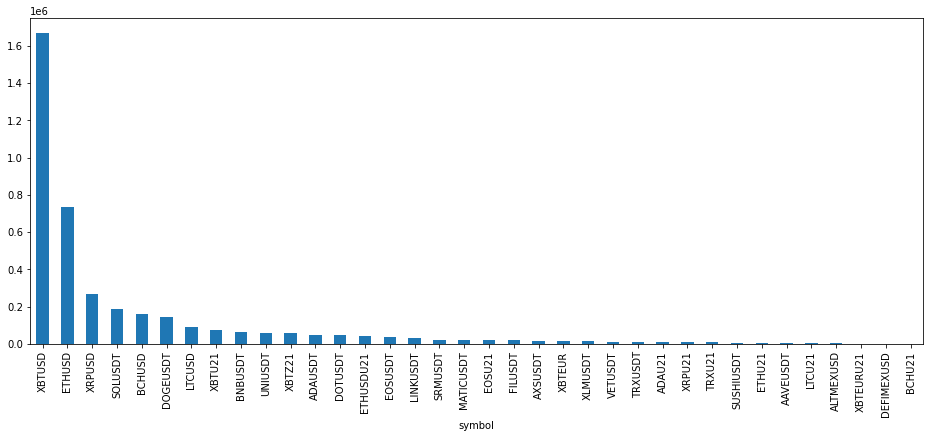

In [11]:
df.groupby('symbol')['timestamp'].count().sort_values(ascending=False).plot.bar(figsize=(16, 6));